### **This geopandas tutorial is about an example using the spatial join operator in geopandas.**

In [ ]:
!pip install numpy
!pip install pandas
!pip install geopandas 
!pip install pygeos
!pip install rtree

In [ ]:
import numpy as np
import pandas as pd
import geopandas
import pygeos
import rtree


In [ ]:
countries = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
cities = geopandas.read_file(geopandas.datasets.get_path("naturalearth_cities"))

Now, we can plot these 2 geodata frames. 

In [ ]:
countries.head() 


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


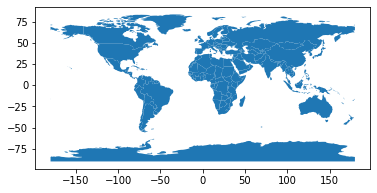

In [ ]:
countries.plot()

In [ ]:
cities.head()


,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


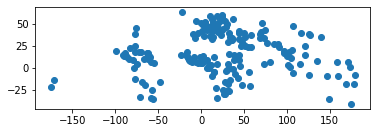

In [ ]:
cities.plot()

In [ ]:
# change the global options that Geopandas inherits from
pd.set_option('display.max_columns', None)


Now, let's join the city dataframe and the country data frame with geopandas.sjoin()

In [ ]:
cities_w_country_data = geopandas.sjoin(cities, countries)

In [ ]:
cities_w_country_data.head()

,name_left,geometry,index_right,pop_est,continent,name_right,iso_a3,gdp_md_est
0,Vatican City,POINT (12.45339 41.90328),141,62137802,Europe,Italy,ITA,2221000.0
1,San Marino,POINT (12.44177 43.93610),141,62137802,Europe,Italy,ITA,2221000.0
192,Rome,POINT (12.48131 41.89790),141,62137802,Europe,Italy,ITA,2221000.0
2,Vaduz,POINT (9.51667 47.13372),114,8754413,Europe,Austria,AUT,416600.0
184,Vienna,POINT (16.36469 48.20196),114,8754413,Europe,Austria,AUT,416600.0


Some problems with plotting both geometries in one plot. 

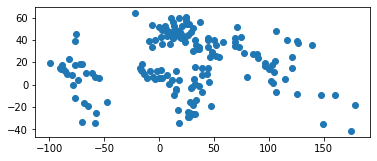

In [ ]:
cities_w_country_data.plot()